# Compute pdfs

In [1]:
import numpy as np
import pandas as pd
import xarray as xr

import os
from glob import glob

import matplotlib.pyplot as plt

import histlib.matchup as match
import histlib.diagnosis as diag
from histlib.cstes import labels, zarr_dir, matchup_dir
from histlib.matchup import _data_var, _stress_var, _aviso_var

/home1/datahome/mdemol/.miniconda3/envs/histenv2/lib/python3.9/site-packages/dask/config.py:742: FutureWarning: Dask configuration key 'distributed.scheduler.transition-log-length' has been deprecated; please use 'distributed.admin.low-level-log-length' instead
  warnings.warn(
/home1/datahome/mdemol/.miniconda3/envs/histenv2/lib/python3.9/site-packages/dask/config.py:742: FutureWarning: Dask configuration key 'distributed.comm.recent-messages-log-length' has been deprecated; please use 'distributed.admin.low-level-log-length' instead
  warnings.warn(


In [2]:
if True:
    from dask.distributed import Client
    from dask_jobqueue import PBSCluster
    #cluster = PBSCluster(cores=56, processes=28, walltime='04:00:00')
    #cluster = PBSCluster(cores=7, processes=7, walltime='04:00:00')
    cluster = PBSCluster(cores=8, processes=8, walltime='04:00:00')
    w = cluster.scale(jobs=3)
else:
    from dask.distributed import Client, LocalCluster
    cluster = LocalCluster()

client = Client(cluster)
client

Connection method: Cluster object,Cluster type: dask_jobqueue.PBSCluster
Dashboard: http://10.148.0.75:8787/status,
Dashboard: http://10.148.0.75:8787/status,Workers: 0
Total threads: 0,Total memory: 0 B
Comm: tcp://10.148.0.75:52712,Workers: 0
Dashboard: http://10.148.0.75:8787/status,Total threads: 0
Started: Just now,Total memory: 0 B


# Build and store dataset

In [4]:
var = [
    'drifter_acc_x_0',
    'drifter_acc_y_0',
    'drifter_coriolis_x_0',
    'drifter_coriolis_y_0',
    'e5_cstrio_z0_alti_wd_x',
    'e5_cstrio_z0_drifter_wd_x',
    'e5_cstrio_z15_alti_wd_x',
    'e5_cstrio_z15_drifter_wd_x',
    'es_cstrio_z0_alti_wd_x',
    'es_cstrio_z0_drifter_wd_x',
    'es_cstrio_z15_alti_wd_x',
    'es_cstrio_z15_drifter_wd_x',
    'e5_cstrio_z0_alti_wd_y',
    'e5_cstrio_z0_drifter_wd_y',
    'e5_cstrio_z15_alti_wd_y',
    'e5_cstrio_z15_drifter_wd_y',
    'es_cstrio_z0_alti_wd_y',
    'es_cstrio_z0_drifter_wd_y',
    'es_cstrio_z15_alti_wd_y',
    'es_cstrio_z15_drifter_wd_y',
    'alti_ggx_adt_filtered',
    'alti_ggx_adt_unfiltered',
    'alti_ggx_adt_unfiltered_denoised',
    'alti_ggx_sla_filtered',
    'alti_ggx_sla_unfiltered',
    'alti_ggx_sla_unfiltered_denoised',
    'aviso_alti_ggx_adt',
    'aviso_alti_ggx_sla',
    'aviso_drifter_ggx_adt',
    'aviso_drifter_ggx_sla',
    'aviso_alti_ggy_adt',
    'aviso_alti_ggy_sla',
    'aviso_drifter_ggy_adt',
    'aviso_drifter_ggy_sla',
]

In [ ]:
acc_bins=np.arange(-1e-4,1e-4,1e-6)
L=[]
Ld=[]
Lnd=[]
for l in labels :
    ds = xr.open_dataset(os.path.join(matchup_dir, f'matchup_{l}.zarr'))[var+['drogue_status']].chunk({'obs':500})
    dsd = ds.where(ds.drogue_status, drop=True).drop('drogue_status')
    dsnd = ds.where(np.logical_not(ds.drogue_status), drop=True).drop('drogue_status')
    L.append(diag.compute_pdfs(ds.drop('drogue_status'), acc_bins))
    if dsd.dims['obs']!=0 : Ld.append(diag.compute_pdfs(dsd, acc_bins))
    if dsnd.dims['obs']!=0 : Lnd.append(diag.compute_pdfs(dsnd, acc_bins))
    print(l)
ds_pdf = xr.concat(L, dim=pd.Index(labels, name='drifter_sat_year'))
ds_pdf.to_zarr(os.path.join(zarr_dir+'_ok','pdfs_accbins.zarr'), mode='w')
ds_pdf_d = xr.concat(Ld, dim=pd.Index(labels, name='drifter_sat_year'))
ds_pdf_d.to_zarr(os.path.join(zarr_dir+'_ok','pdfs_accbins_drogued.zarr'))
ds_pdf_nd = xr.concat(Lnd, dim=pd.Index(labels, name='drifter_sat_year'))
ds_pdf_nd.to_zarr(os.path.join(zarr_dir+'_ok','pdfs_accbins_undrogued.zarr'))

gps_Jason-3_2020
argos_Jason-3_2020
gps_SARAL_2020
argos_SARAL_2020
gps_Cryosat-2_2020
argos_Cryosat-2_2020
gps_Sentinel-3_A_2020
argos_Sentinel-3_A_2020
gps_Sentinel-3_B_2020
argos_Sentinel-3_B_2020
gps_Jason-3_2019
argos_Jason-3_2019
gps_SARAL_2019
argos_SARAL_2019
gps_Cryosat-2_2019
argos_Cryosat-2_2019
gps_Sentinel-3_A_2019
argos_Sentinel-3_A_2019
gps_Sentinel-3_B_2019
argos_Sentinel-3_B_2019
gps_Jason-3_2018
argos_Jason-3_2018
gps_SARAL_2018
argos_SARAL_2018
gps_Cryosat-2_2018
argos_Cryosat-2_2018
gps_Sentinel-3_A_2018
argos_Sentinel-3_A_2018
gps_Sentinel-3_B_2018
argos_Sentinel-3_B_2018
gps_Jason-3_2017
argos_Jason-3_2017
gps_Jason-2_2017
argos_Jason-2_2017
gps_SARAL_2017
argos_SARAL_2017
gps_Cryosat-2_2017
argos_Cryosat-2_2017
gps_Sentinel-3_A_2017
argos_Sentinel-3_A_2017
gps_Jason-3_2016
argos_Jason-3_2016
gps_Jason-2_2016


# See pdf

# GPS-ARGOS

In [50]:
list_gps = [l for l in ds_pdf.drifter_sat_year.values if 'gps' in l]
list_argos = [l for l in ds_pdf.drifter_sat_year.values if 'argos' in l]
dgps = diag.global_pdf(ds_pdf.sel(drifter_sat_year=list_gps))
dargos = diag.global_pdf(ds_pdf.sel(drifter_sat_year=list_argos))

dgps.acc_bin.attrs={'longname':'accbins', 'units':r'$m.s^{-2}$'}
dargos.acc_bin.attrs={'longname':'accbins', 'units':r'$m.s^{-2}$'}

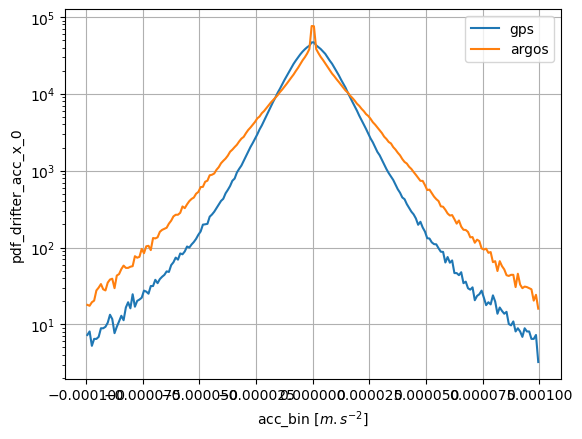

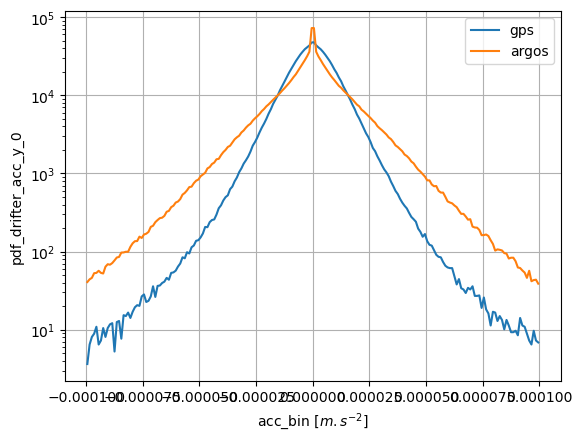

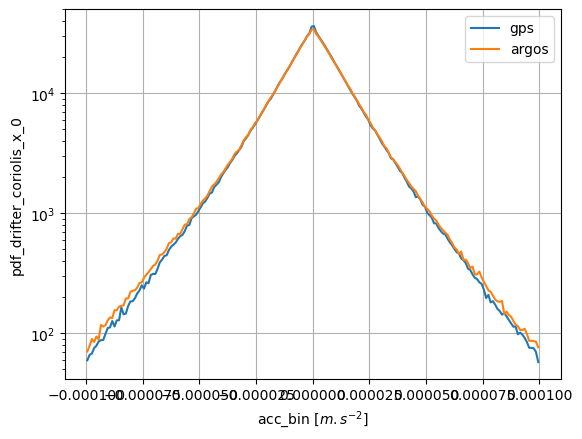

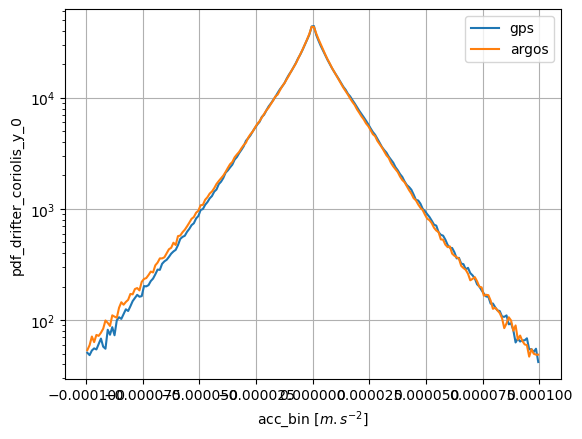

In [58]:
for v in list(dgps.variables) :
    if 'pdf_drifter' in v :
        fig, ax = plt.subplots(1,1)
        dgps[v].plot(ax=ax, label='gps')
        dargos[v].plot(ax=ax, label='argos')
        ax.set_yscale('log')
        ax.grid()
        ax.legend()

# Satellite

In [61]:
list_SARAL = [l for l in list_gps if 'SARAL' in l]
list_Sentinel = [l for l in list_gps if 'Sentinel' in l]
list_Cryosat = [l for l in list_gps if 'Cryosat-2' in l]
list_Jason = [l for l in list_gps if 'Jason' in l]
dsaral = diag.global_pdf(ds_pdf.sel(drifter_sat_year=list_SARAL))
dsent = diag.global_pdf(ds_pdf.sel(drifter_sat_year=list_Sentinel))
dcryo = diag.global_pdf(ds_pdf.sel(drifter_sat_year=list_Cryosat))
djason= diag.global_pdf(ds_pdf.sel(drifter_sat_year=list_Jason))


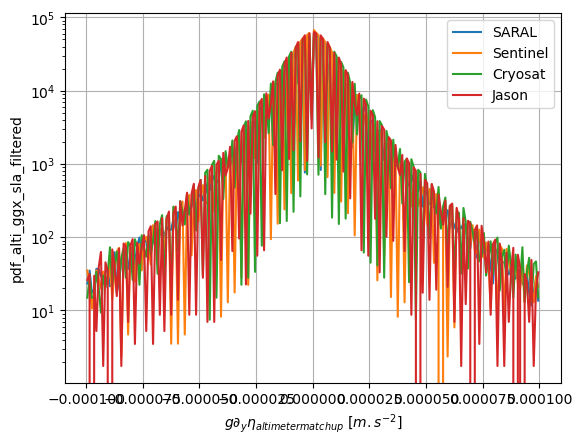

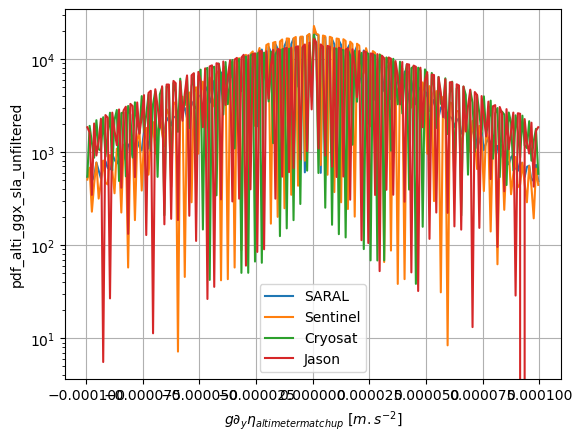

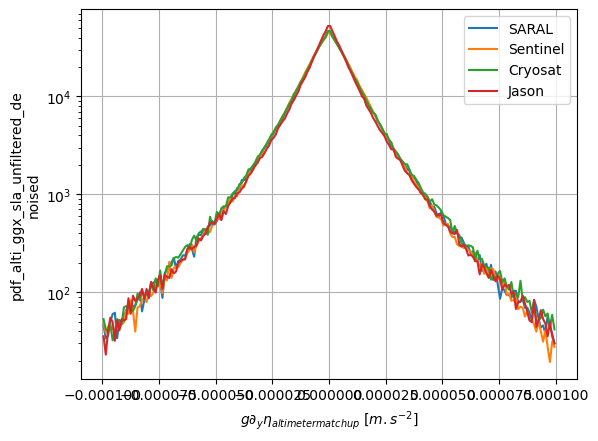

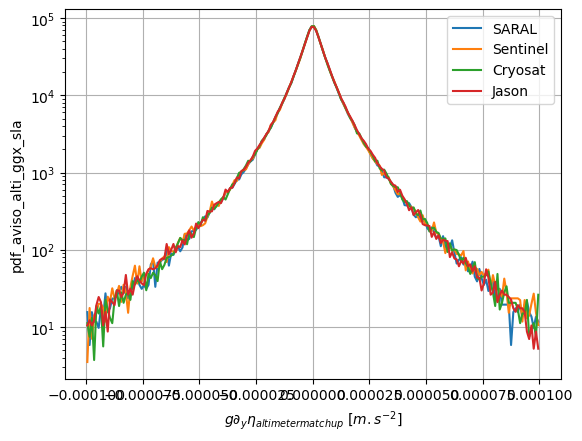

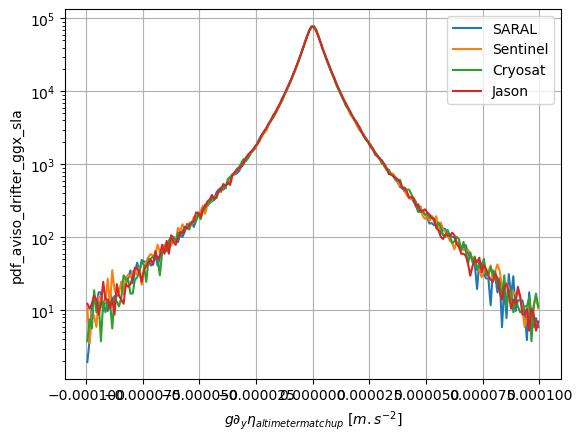

In [62]:
for v in list(dgps.variables) :
    if 'ggx_sla' in v :
        fig, ax = plt.subplots(1,1)
        dsaral[v].plot(ax=ax, label='SARAL')
        dsent[v].plot(ax=ax, label='Sentinel')
        dcryo[v].plot(ax=ax, label='Cryosat')
        djason[v].plot(ax=ax, label='Jason')
        ax.set_yscale('log')
        ax.grid()
        ax.legend()

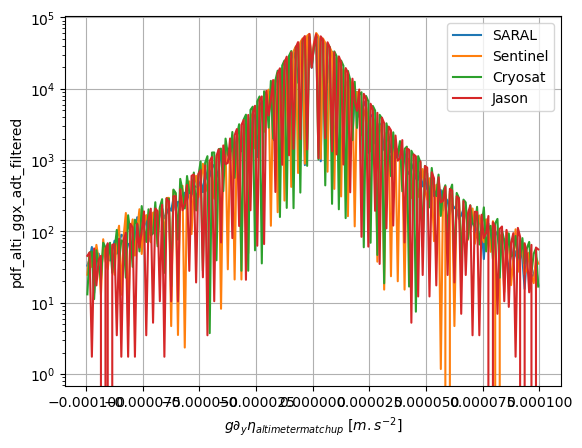

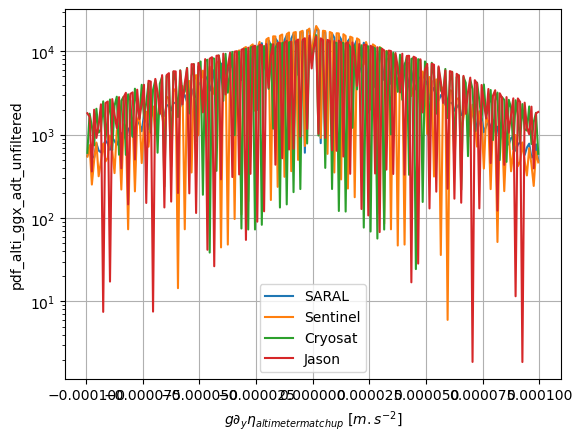

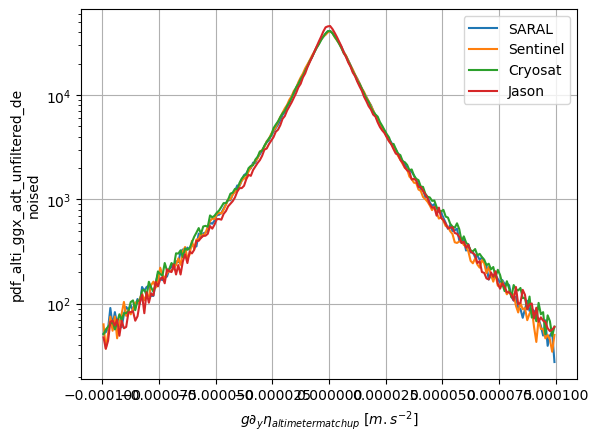

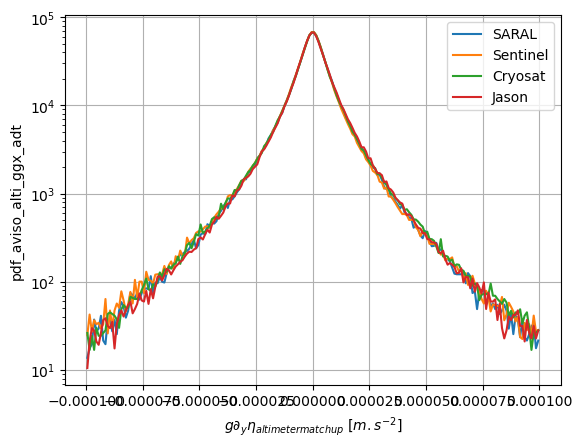

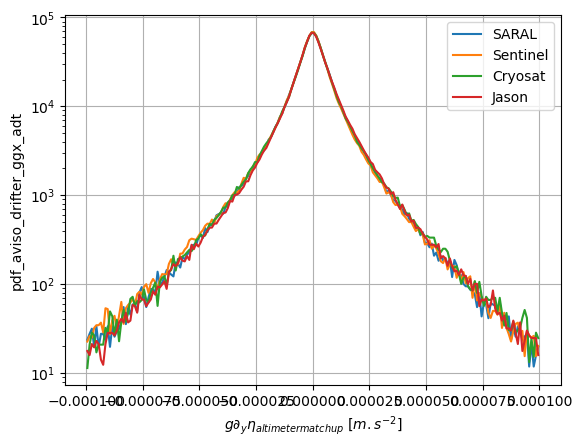

In [63]:
for v in list(dgps.variables) :
    if 'ggx_adt' in v :
        fig, ax = plt.subplots(1,1)
        dsaral[v].plot(ax=ax, label='SARAL')
        dsent[v].plot(ax=ax, label='Sentinel')
        dcryo[v].plot(ax=ax, label='Cryosat')
        djason[v].plot(ax=ax, label='Jason')
        ax.set_yscale('log')
        ax.grid()
        ax.legend()

# Global

In [ ]:
ds_pdf_g = diag.global_pdf(ds_pdf)

In [6]:
cluster.close()